In [7]:
%reload_ext tensorboard

In [8]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from PIL import Image
import glob
import pathlib
import PIL
from io import BytesIO
import seaborn as sns
#%load_ext tensorboard
from tensorflow import keras
from keras import layers
from tensorflow.keras import layers
from keras_preprocessing import image
from sklearn.utils import shuffle
from sklearn import metrics
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from urllib.request import urlopen
import matplotlib.image as implt
import time,datetime,keras,cv2,shutil,keras_preprocessing,requests
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
# Data
trainFolder = "C://users/Administrator/Desktop/colabprojects/horse-or-human/train"
testFolder = "C://users/Administrator/Desktop/colabprojects/horse-or-human/validation"

In [10]:
listLabels = labels = ['Horse','Human']

In [11]:
# Image generator
imageGenerator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    zoom_range=0.15,
    zca_whitening=True,
    fill_mode='nearest')

# training images
trainImages = imageGenerator.flow_from_directory(
    trainFolder,
    target_size=(48,48),
    class_mode='categorical'
)



# test Images
testImages = ImageDataGenerator(rescale=1./255)
testImages = imageGenerator.flow_from_directory(
        testFolder,
        target_size=(48, 48),
        class_mode='categorical')

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=(48,48,3)),
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(32, activation="relu"),
        layers.Dense(2, activation="softmax"),
    ]
)

model.build((48, 48))
model.summary()
#opt = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6912)              0         
                                                                 
 batch_normalization (BatchN  (None, 6912)             27648     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               884864    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 2)                 6

In [13]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print("Epoch",epoch,'completed', end='')

            
qtyEpochs = 50
history = model.fit(trainImages, validation_data=testImages,batch_size=50, shuffle=True, epochs=qtyEpochs, callbacks=[early_stop,PrintDot()], verbose=1)

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
33/33 [==============================] - 16s 447ms/step - loss: 0.4923 - accuracy: 0.8014 - val_loss: 4.9185 - val_accuracy: 0.5000
Epoch 2/50
33/33 [==============================] - 7s 225ms/step - loss: 0.2523 - accuracy: 0.9026 - val_loss: 3.0471 - val_accuracy: 0.5000
Epoch 3/50
33/33 [==============================] - 7s 221ms/step - loss: 0.1871 - accuracy: 0.9260 - val_loss: 0.6186 - val_accuracy: 0.7695
Epoch 4/50
33/33 [==============================] - 7s 227ms/step - loss: 0.1739 - accuracy: 0.9357 - val_loss: 0.7631 - val_accuracy: 0.7656
Epoch 5/50
33/33 [==============================] - 7s 222ms/step - loss: 0.1308 - accuracy: 0.9533 - val_loss: 0.8341 - val_accuracy: 0.7578
Epoch 6/50
33/33 [==============================] - 8s 240ms/step - loss: 0.1253 - accuracy: 0.9640 - val_loss: 0.2263 - val_accuracy: 0.9102
Epoch 7/50
33/33 [==============================] - 9s 274ms/step - loss: 0.1227 - accuracy: 0.9542 - val_loss: 0.3503 - val_accuracy: 0.9023
Epoch

In [14]:
model_eval = model.evaluate_generator (
    testImages,
    verbose=0
)

print('Model accuracy:',model_eval[1])
print('Model loss:',model_eval[0])

<ipython-input-14-bfa28deda51a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model_eval = model.evaluate_generator (


Model accuracy: 0.8671875
Model loss: 0.6314261555671692


In [30]:
Folder = "C:/Users/Administrator/Desktop/horse01-9.png"
test01 = PIL.Image.open(Folder)
test01 = test01.convert('RGB')
test01 = test01.resize((48,48))
test01_arr = np.asarray(test01) / 255
pred = model.predict(np.array([test01_arr]))
print("Pred:",labels[pred.argmax(axis=-1)[0]])

Pred: Horse


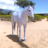

In [31]:
test01